# NLP Classification(Ham vs SPAM)

#####  https://www.kaggle.com/faressayah/natural-language-processing-nlp-for-beginners/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

### Sample 

In [2]:
simple_train = ['call you tonight', 'Call me a cab', 'Please call me... PLEASE']

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [4]:
vect.fit(simple_train)

CountVectorizer()

In [5]:
vect.get_feature_names()

['cab', 'call', 'me', 'please', 'tonight', 'you']

In [6]:
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<3x6 sparse matrix of type '<class 'numpy.int64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [7]:
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [8]:
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [9]:
type(simple_train_dtm)

scipy.sparse.csr.csr_matrix

In [10]:
print(simple_train_dtm)

  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


In [11]:
simple_test = ["please don't call me"]

In [12]:
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]], dtype=int64)

In [13]:
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


### Read data into pandas

In [15]:
sms = pd.read_csv("./spam.csv", encoding='latin-1')

In [16]:
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [17]:
sms.dropna(how='any', inplace=True, axis=1)

In [18]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
sms.columns = ['label', 'message']

In [20]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis(EDA)

In [21]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [22]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [23]:
sms['label_num'] = sms.label.map({'ham':0, 'spam': 1})

In [24]:
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


### Feature Engineering

In [25]:
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [26]:
sms['message_len'].mean()

80.11880832735105

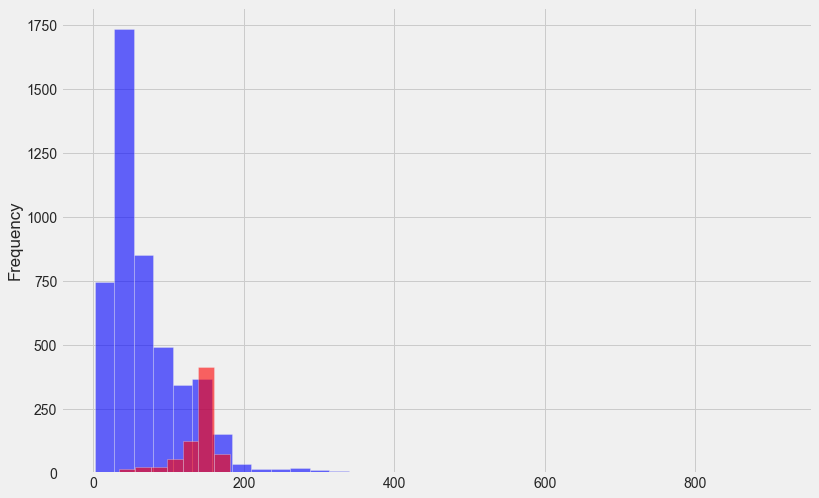

In [32]:
#plt.show()를 하는 경우 범례 추가가 되지 않음. 

plt.figure(figsize=(12, 8))
sms[sms.label == 'ham'].message_len.plot(bins=35, kind='hist', color='blue', label='ham message', alpha=0.6)
sms[sms.label == 'spam'].message_len.plot(kind='hist', color='red', label='spam message', alpha=0.6)

plt.show()
#plt.legend()
#plt.xlabel("Message Length")

Text(0.5, 0, 'Message Length')

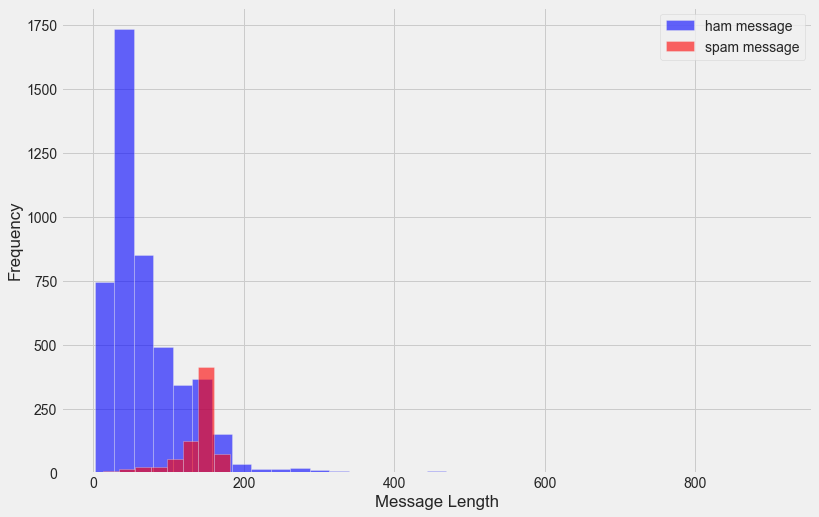

In [33]:
plt.figure(figsize=(12, 8))
sms[sms.label == 'ham'].message_len.plot(bins=35, kind='hist', color='blue', label='ham message', alpha=0.6)
sms[sms.label == 'spam'].message_len.plot(kind='hist', color='red', label='spam message', alpha=0.6)

plt.legend()
plt.xlabel("Message Length")

In [34]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [35]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [40]:
reversed(sms['message_len'])

In [42]:
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [43]:
message_len_ham = sms['message_len']

In [45]:
message_len_ham.head()

0    111
1     29
2    155
3     49
4     61
Name: message_len, dtype: int64

In [49]:
sorted(message_len_ham, reverse=True)

[910,
 790,
 632,
 611,
 588,
 588,
 482,
 461,
 458,
 450,
 450,
 444,
 444,
 444,
 431,
 415,
 408,
 384,
 382,
 381,
 375,
 372,
 368,
 363,
 338,
 332,
 329,
 329,
 329,
 327,
 327,
 322,
 320,
 306,
 302,
 300,
 299,
 298,
 297,
 295,
 293,
 291,
 290,
 289,
 287,
 283,
 281,
 281,
 281,
 281,
 278,
 278,
 278,
 276,
 276,
 276,
 276,
 276,
 274,
 273,
 269,
 269,
 263,
 263,
 257,
 256,
 255,
 251,
 248,
 247,
 245,
 245,
 244,
 244,
 243,
 242,
 240,
 237,
 237,
 237,
 236,
 235,
 234,
 232,
 231,
 230,
 229,
 228,
 226,
 224,
 224,
 221,
 221,
 220,
 220,
 215,
 212,
 212,
 210,
 208,
 207,
 205,
 205,
 205,
 204,
 204,
 203,
 202,
 202,
 202,
 201,
 201,
 200,
 200,
 198,
 198,
 197,
 196,
 195,
 195,
 194,
 193,
 193,
 192,
 191,
 191,
 191,
 190,
 189,
 189,
 189,
 188,
 185,
 185,
 184,
 184,
 184,
 183,
 183,
 183,
 183,
 183,
 183,
 181,
 181,
 181,
 180,
 180,
 180,
 180,
 179,
 179,
 179,
 179,
 179,
 179,
 179,
 179,
 177,
 177,
 176,
 176,
 175,
 175,
 175,
 175,
 175

In [56]:
sms[sms.message_len == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

### Text Pre-processing 

In [59]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    #check character to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    #join the characters again to from the string
    nopunc = ''.join(nopunc)
    #remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [60]:
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [62]:
sms['clean_msg'] = sms.message.apply(text_process)

In [63]:
sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though


In [64]:
type(stopwords.words('english'))

list

In [66]:
from collections import Counter

words = sms[sms.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [67]:
from collections import Counter

words = sms[sms.label=='spam'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


### Vectorization

In [68]:
X = sms.clean_msg
y = sms.label_num
print(X.shape, y.shape)

(5572,) (5572,)


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


### Vectorizer 

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
#X_train을 vector로 변환
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [72]:
#학습, document-term matrix 생성
X_train_dtm = vect.transform(X_train)

In [73]:
# equivalently: combine fit and transform into a single step
# 위의 두 과정을 한번에 하려면 이렇게 해도 된다(?)

X_train_dtm = vect.fit_transform(X_train)

In [74]:
X_train_dtm

<4179x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 34796 stored elements in Compressed Sparse Row format>

In [75]:
X_test_dtm = vect.transform(X_test)

In [76]:
X_test_dtm

<1393x7996 sparse matrix of type '<class 'numpy.int64'>'
	with 9971 stored elements in Compressed Sparse Row format>

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tfidf_transformer.transform(X_train_dtm)

<4179x7996 sparse matrix of type '<class 'numpy.float64'>'
	with 34796 stored elements in Compressed Sparse Row format>

### Fit model(multinomial Naive Bayes)

In [78]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [80]:
%time nb.fit(X_train_dtm, y_train)

Wall time: 24.9 ms


MultinomialNB()

In [81]:
y_pred_class = nb.predict(X_test_dtm)

In [82]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9827709978463748

In [83]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[1205,    8],
       [  16,  164]], dtype=int64)

In [85]:
X_test.shape

(1393,)

In [86]:
# print message text for false positives (ham incorrectly classifier)
# X_test[(y_pred_class==1) & (y_test==0)]
X_test[y_pred_class > y_test]

2418    Madamregret disturbancemight receive reference...
4598                                laid airtel line rest
386                                   Customer place call
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
5094    Hi ShanilRakhesh herethanksi exchanged uncut d...
494                                      free nowcan call
759     Call youcarlos isare phones vibrate acting mig...
3140                                  Customer place call
Name: clean_msg, dtype: object

In [88]:
# print message text for false negatives (spam incorrectly classifier)
X_test[y_pred_class < y_test]

4674    Hi babe Chloe r smashed saturday night great w...
3528    Xmas New Years Eve tickets sale club day 10am ...
3417    LIFE never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
1960    Guess Somebody know secretly fancies Wanna fin...
5       FreeMsg Hey darling 3 weeks word back Id like ...
2078                         85233 FREERingtoneReply REAL
1457    CLAIRE havin borin time alone wanna cum 2nite ...
190     unique enough Find 30th August wwwareyouunique...
2429    Guess IThis first time created web page WWWASJ...
3057    unsubscribed services Get tons sexy babes hunk...
1021    Guess Somebody know secretly fancies Wanna fin...
4067    TBSPERSOLVO chasing us since Sept forå£38 defi...
3358         Sorry missed call lets talk time 07090201529
2821    ROMCAPspam Everyone around responding well pre...
2247    Back work 2morro half term C 2nite sexy passio...
Name: clean_msg, dtype: object

In [89]:
X_test[4949]

'Hi probably much fun get message thought id txt cos bored james farting night'

In [91]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([2.11903975e-02, 3.97831612e-04, 1.06470895e-03, ...,
       1.31939653e-02, 9.99821127e-05, 6.04083365e-06])

In [96]:
from sklearn.metrics import roc_auc_score
metrics.roc_auc_score(y_test, y_pred_prob)

0.9774342768159751

In [97]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow', CountVectorizer()),
                ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('model', MultinomialNB())])

In [98]:
y_pred = pipe.predict(X_test)

In [99]:
metrics.accuracy_score(y_test, y_pred)

0.9669777458722182

In [100]:
metrics.confusion_matrix(y_test, y_pred)

array([[1213,    0],
       [  46,  134]], dtype=int64)

### Model Comparing

#### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear')

In [103]:
%time logreg.fit(X_train_dtm, y_train)

Wall time: 158 ms


LogisticRegression(solver='liblinear')

In [104]:
y_pred_class = logreg.predict(X_test_dtm)

In [105]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.01694418, 0.0152182 , 0.08261755, ..., 0.02198942, 0.00531726,
       0.00679188])

In [106]:
metrics.accuracy_score(y_test, y_pred_class)

0.9842067480258435

In [107]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1213,    0],
       [  22,  158]], dtype=int64)

In [108]:
metrics.roc_auc_score(y_test, y_pred_prob)

0.9835714940001832

### Tuning the vectorizer

In [109]:
vect

CountVectorizer()

In [110]:
# remove English stop words
vect = CountVectorizer(stop_words='engish')

In [111]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1,2))

In [112]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

In [113]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)